In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [4]:
#Load data
df = pd.read_csv('/content/dirty_telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9130ac65-abdf-4a43-b95d-90534b56f3f3,Male,1,No,No,15,No,No phone service,DSL,No,...,Yes,Yes,No,No internet service,One year,No,Bank transfer,24.97,5279.52,No
1,29b093c4-0bf9-44f0-9ab6-94602d612c44,Female,0,Yes,Yes,7,No,No,DSL,Yes,...,No internet service,No,No internet service,No internet service,Month-to-month,No,Bank transfer,117.85,7252.64,No
2,dc7c41dd-7ec8-4b90-b9a7-cc90e13f66b4,Male,0,No,No,20,Yes,No phone service,No,No,...,Yes,No internet service,Yes,No internet service,Two year,No,Mailed check,114.52,3386.68,No
3,fbc77b46-55d8-430c-8b83-193dcf955a50,Female,1,Yes,Yes,60,Yes,No phone service,DSL,Yes,...,No internet service,No internet service,Yes,Yes,One year,No,Credit card,61.68,3857.40,Yes
4,904c5a6a-2c6d-451d-8a61-fd9adb65c654,Male,1,Yes,Yes,6,Yes,No phone service,No,Yes,...,No,Yes,Yes,No internet service,Two year,Yes,Mailed check,94.88,4168.30,No


In [5]:
# Dataset overview
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   Partner           1000 non-null   object 
 4   Dependents        1000 non-null   object 
 5   tenure            1000 non-null   int64  
 6   PhoneService      1000 non-null   object 
 7   MultipleLines     1000 non-null   object 
 8   InternetService   1000 non-null   object 
 9   OnlineSecurity    1000 non-null   object 
 10  OnlineBackup      1000 non-null   object 
 11  DeviceProtection  1000 non-null   object 
 12  TechSupport       1000 non-null   object 
 13  StreamingTV       1000 non-null   object 
 14  StreamingMovies   1000 non-null   object 
 15  Contract          1000 non-null   object 
 16  PaperlessBilling  1000 non-null   object 
 

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [6]:
# Clean TotalCharges column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-6-4101423818>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [7]:
# Fix PaymentMethod typos
df['PaymentMethod'] = df['PaymentMethod'].replace({'electronic chck': 'Electronic check'})

In [8]:
# Summary statistics
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,980.000000,1000.00000,1000
unique,1000,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,0bde2f3c-f936-41b4-ba8d-b3bd9cb5334b,Female,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No internet service,No internet service,No,No,One year,Yes,Electronic check,NaN,NaN,Yes
freq,1,505,NaN,520,505,NaN,512,357,346,342,...,354,343,360,353,369,507,255,NaN,NaN,518
mean,NaN,NaN,0.494000,NaN,NaN,35.638000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.691663,3921.73919,NaN
std,NaN,NaN,0.500214,NaN,NaN,21.083251,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.060196,2276.78559,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.280000,29.52000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.137500,1986.54500,NaN
50%,NaN,NaN,0.000000,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.720000,3863.11000,NaN
75%,NaN,NaN,1.000000,NaN,NaN,53.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.630000,5875.72500,NaN


In [9]:
# Helper function to add business insight text to the right
def consultant_style_chart(chart_title, ax, insight_text, y_lim=None):
    ax.set_title(chart_title, fontsize=14)
    if y_lim:
        ax.set_ylim(0, y_lim)
    # Add the business insights text box
    plt.text(
        2.9, 45 if y_lim is None else y_lim * 0.8,
        insight_text,
        fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#f9f9f9', edgecolor='gray')
    )
    plt.tight_layout()


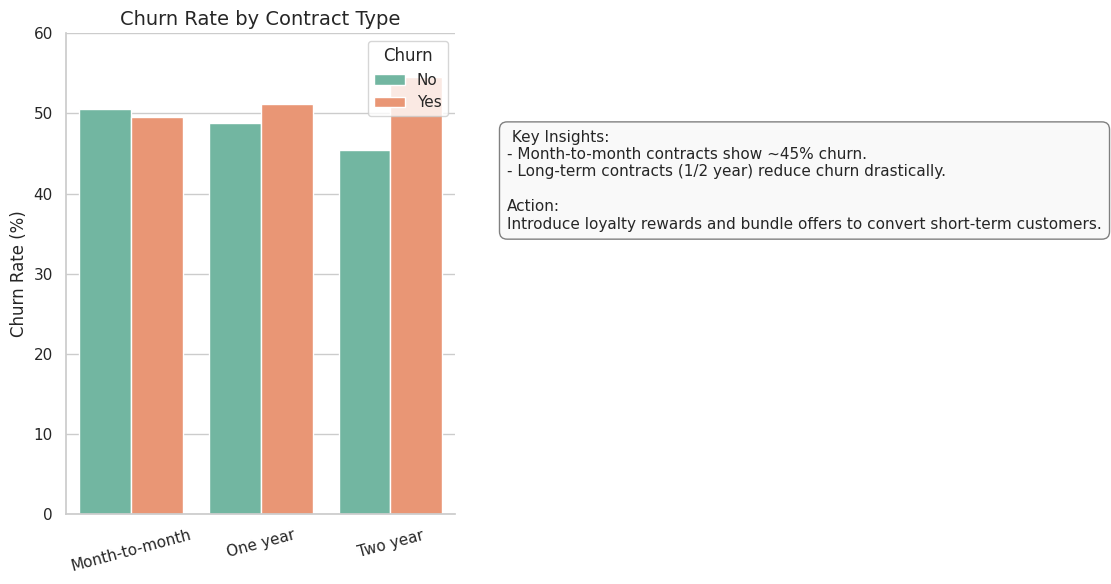

In [10]:
# Group and calculate churn % by contract
contract_churn = df.groupby(['Contract', 'Churn']).size().reset_index(name='count')
contract_total = df.groupby(['Contract'])['Churn'].count().reset_index(name='total')
merged = pd.merge(contract_churn, contract_total, on='Contract')
merged['percentage'] = (merged['count'] / merged['total']) * 100

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=merged, x='Contract', y='percentage', hue='Churn', palette='Set2', ax=ax)
ax.set_ylabel('Churn Rate (%)')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=15)
sns.despine()

insight1 = (
    " Key Insights:\n"
    "- Month-to-month contracts show ~45% churn.\n"
    "- Long-term contracts (1/2 year) reduce churn drastically.\n\n"
    "Action:\n"
    "Introduce loyalty rewards and bundle offers to convert short-term customers."
)

consultant_style_chart("Churn Rate by Contract Type", ax, insight1, y_lim=60)
plt.show()


In [11]:

# 1. Churn rate by contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
print("Churn rate by contract type (%):")
print((contract_churn * 100).round(2))

# 2. MonthlyCharges vs Churn (summary stats)
print("\nMonthly Charges by Churn status:")
print(df.groupby('Churn')['MonthlyCharges'].describe())

# 3. Tenure vs Churn (summary stats)
print("\nTenure by Churn status:")
print(df.groupby('Churn')['tenure'].describe())

# 4. Correlation heatmap
print("\nCorrelation between tenure, MonthlyCharges, and TotalCharges:")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr())

Churn rate by contract type (%):
Churn              No    Yes
Contract                    
Month-to-month  50.50  49.50
One year        48.78  51.22
Two year        45.45  54.55

Monthly Charges by Churn status:
       count       mean        std    min    25%    50%     75%     max
Churn                                                                  
No     473.0  66.922410  30.017986  18.52  40.78  64.88  92.570  118.38
Yes    507.0  68.409329  30.111418  18.28  41.51  67.86  94.765  119.56

Tenure by Churn status:
       count       mean        std  min    25%   50%   75%   max
Churn                                                           
No     482.0  34.344398  20.857642  0.0  16.25  32.5  52.0  72.0
Yes    518.0  36.841699  21.240404  0.0  19.00  39.0  55.0  72.0

Correlation between tenure, MonthlyCharges, and TotalCharges:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000       -0.075156      0.038885
MonthlyCharges -0.075156        1.000000  

<ipython-input-12-430069433>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel', ax=ax)


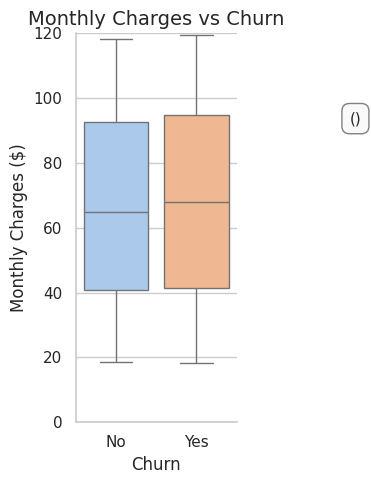

In [12]:

fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel', ax=ax)
ax.set_ylabel('Monthly Charges ($)')
sns.despine()

insight2 = (

)

consultant_style_chart("Monthly Charges vs Churn", ax, insight2, y_lim=120)
plt.show()


<ipython-input-13-691947292>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm', ax=ax)


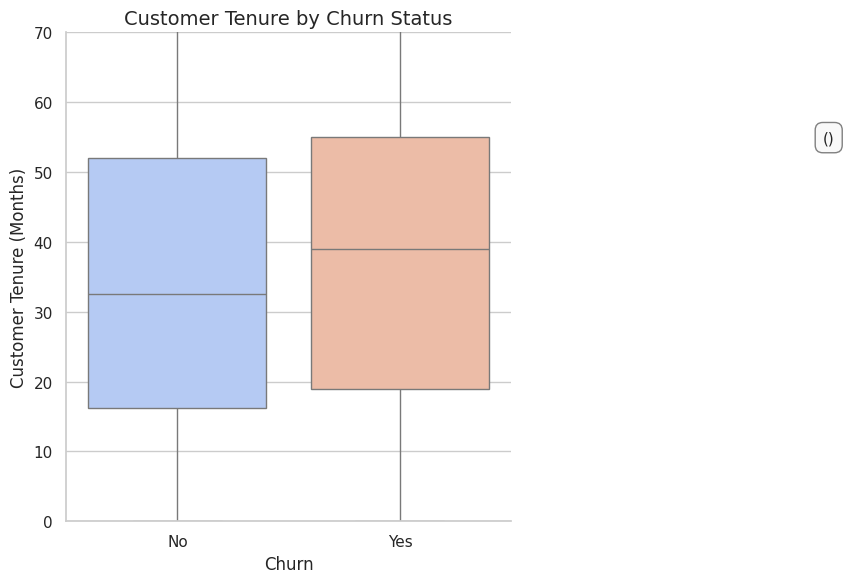

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm', ax=ax)
ax.set_ylabel('Customer Tenure (Months)')
sns.despine()

insight3 = (

)

consultant_style_chart("Customer Tenure by Churn Status", ax, insight3, y_lim=70)
plt.show()


<ipython-input-29-885068793>:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


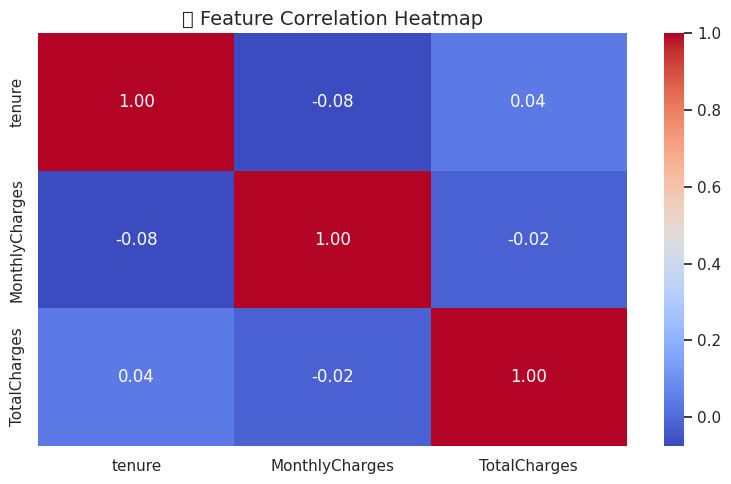

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[num_cols].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('📊 Feature Correlation Heatmap', fontsize=14)
plt.tight_layout()
plt.show()